# Spam mail classification

To create a classifier that helps classify between Spam
(unimportant) mail & Ham (important) mail
Feel free to do any text cleaning and feature engineering required.
Compare using both ML & DL model approaches for the purpose.

## 1. Data Gathering

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# need to mount your drive using the following commands
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Try reading the CSV with a different encoding
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data Science for Business/6. Spam Mail Classifier/Hamspam.csv', encoding='latin-1')

# 2. Data cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5559 entries, 0 to 5558
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    5559 non-null   object
 1   text    5559 non-null   object
dtypes: object(2)
memory usage: 87.0+ KB


In [ ]:
df.sample(5)

,type,text
4802,ham,NOT ENUFCREDEIT TOCALL.SHALL ILEAVE UNI AT 6 +...
2461,ham,Am on a train back from northampton so i'm afr...
1656,spam,This is the 2nd time we have tried 2 contact u...
567,ham,I wish u were here. I feel so alone
5194,ham,The LAY MAN! Just to let you know you are miss...


In [ ]:
# Renaming the column
df.rename(columns={"type":"target"}, inplace=True)
df.sample(5)

,target,text
1347,ham,Ard 6 like dat lor.
4511,ham,"So anyways, you can just go to your gym or wha..."
3593,ham,K. I will sent it again
4285,ham,"Wa, ur openin sentence very formal... Anyway, ..."
467,ham,I'm in school now n i'll be in da lab doing so...


In [ ]:
from sklearn.preprocessing import LabelEncoder # Importing LabelEncoder class from sklearn.preprocession
encoder = LabelEncoder() # creates an instance from the LabelEncoder
df['target'] = encoder.fit_transform(df['target']) #This converts these unique text values into numerical labels.

In [ ]:
# Finding missing values
df.isnull().sum()

,0
target,0
text,0


In [ ]:
# checking for duplicated values
df.duplicated().sum()

np.int64(403)

In [ ]:
df = df.drop_duplicates(keep='first')

## 3. EDA

In [ ]:
df.head()

,target,text
0,0,Hope you are having a good week. Just checking in
1,0,K..give back my thanks.
2,0,Am also doing in cbe only. But have to pay.
3,1,"complimentary 4 STAR Ibiza Holiday or å£10,000..."
4,1,okmail: Dear Dave this is your final notice to...


In [ ]:
df['target'].value_counts()

,count
target,
0,4503
1,653


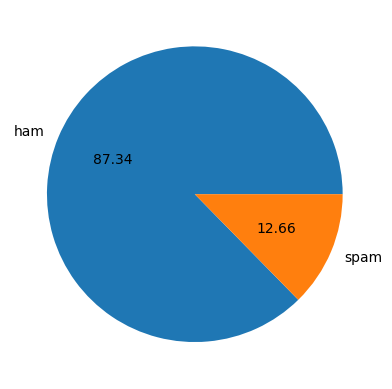

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()
# The result shows that the data is highly imbalanced.

******************************************************************************************************************************************

******************************************************************************************************************************************

#### LEARN HOW TO REMOVE PUNCTUATION FROM TEXT

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
Test = 'Hello Mr. Future, I am so happy to be learning AI now!!'

In [ ]:
Test_punc_removed = [char for char in Test if char not in string.punctuation]
Test_punc_removed[:10]

['H', 'e', 'l', 'l', 'o', ' ', 'M', 'r', ' ', 'F']

In [ ]:
# Join the charecters again to form the string.
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'Hello Mr Future I am so happy to be learning AI now'

#### UNDERSTAND HOW TO REMOVE STOPWORDS

In [ ]:
import nltk # Natural Language Tool Kit
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords
stopwords.words('english')[:10]

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an']

In [ ]:
Test_punc_removed_join

'Hello Mr Future I am so happy to be learning AI now'

In [ ]:
Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split()\
                                if word.lower() \
                                not in stopwords.words('english')]

In [ ]:
Test_punc_removed_join_clean

['Hello', 'Mr', 'Future', 'happy', 'learning', 'AI']

#### UNDERSTAND HOW TO PERFORM COUNT VECTORIZATION (TOKENIZATION)

![alt text](https://drive.google.com/uc?id=1eQi-Gq66e-sNw1ZvGs-zkJg95mCYdFoJ)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first document.','This document is the second document.','And this is the third one.','Is this the first document?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)

In [ ]:
print(vectorizer.get_feature_names_out())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [ ]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [ ]:
mini_challenge = ['Hello World','Hello Hello World','Hello World world world']

vectorizer_challenge = CountVectorizer()
X_challenge = vectorizer_challenge.fit_transform(mini_challenge)
print(X_challenge.toarray())

[[1 1]
 [2 1]
 [1 3]]


******************************************************************************************************************************************

******************************************************************************************************************************************

In [ ]:
import nltk

In [ ]:
nltk.download("punkt_tab") # Sentence tokenization

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
df['num_charecters'] = df['text'].apply(len)

In [ ]:
df.head()

,target,text,num_charecters
0,0,Hope you are having a good week. Just checking in,49
1,0,K..give back my thanks.,23
2,0,Am also doing in cbe only. But have to pay.,43
3,1,"complimentary 4 STAR Ibiza Holiday or å£10,000...",150
4,1,okmail: Dear Dave this is your final notice to...,161


In [ ]:
# num of words
df["num_words"] = df["text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,target,text,num_charecters,num_words
0,0,Hope you are having a good week. Just checking in,49,11
1,0,K..give back my thanks.,23,7
2,0,Am also doing in cbe only. But have to pay.,43,12
3,1,"complimentary 4 STAR Ibiza Holiday or å£10,000...",150,23
4,1,okmail: Dear Dave this is your final notice to...,161,32


In [ ]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
# Breaks on the basis of number of sentences

In [ ]:
df.head()

,target,text,num_charecters,num_words,num_sentences
0,0,Hope you are having a good week. Just checking in,49,11,2
1,0,K..give back my thanks.,23,7,1
2,0,Am also doing in cbe only. But have to pay.,43,12,2
3,1,"complimentary 4 STAR Ibiza Holiday or å£10,000...",150,23,3
4,1,okmail: Dear Dave this is your final notice to...,161,32,3


In [ ]:
df[['num_charecters','num_words','num_sentences']].describe()

,num_charecters,num_words,num_sentences
count,5156.000000,5156.000000,5156.000000
mean,78.768425,18.153607,1.973041
std,57.709698,12.738452,1.457530
min,2.000000,1.000000,1.000000
25%,35.000000,9.000000,1.000000
50%,60.000000,14.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,196.000000,38.000000


In [ ]:
# ham
df[df['target'] == 0][['num_charecters','num_words','num_sentences']].describe()

,num_charecters,num_words,num_sentences
count,4503.000000,4503.000000,4503.000000
mean,70.166556,16.767266,1.827226
std,55.671015,12.788997,1.393931
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,196.000000,38.000000


In [ ]:
df.loc[df['target'] == 1, ['num_charecters','num_words','num_sentences']].describe()

,num_charecters,num_words,num_sentences
count,653.000000,653.000000,653.00000
mean,138.085758,27.713629,2.97856
std,29.943331,6.985683,1.49010
min,13.000000,2.000000,1.00000
25%,132.000000,25.000000,2.00000
50%,149.000000,29.000000,3.00000
75%,157.000000,32.000000,4.00000
max,224.000000,46.000000,9.00000


In [ ]:
import seaborn as sns

<Axes: xlabel='num_charecters', ylabel='Count'>

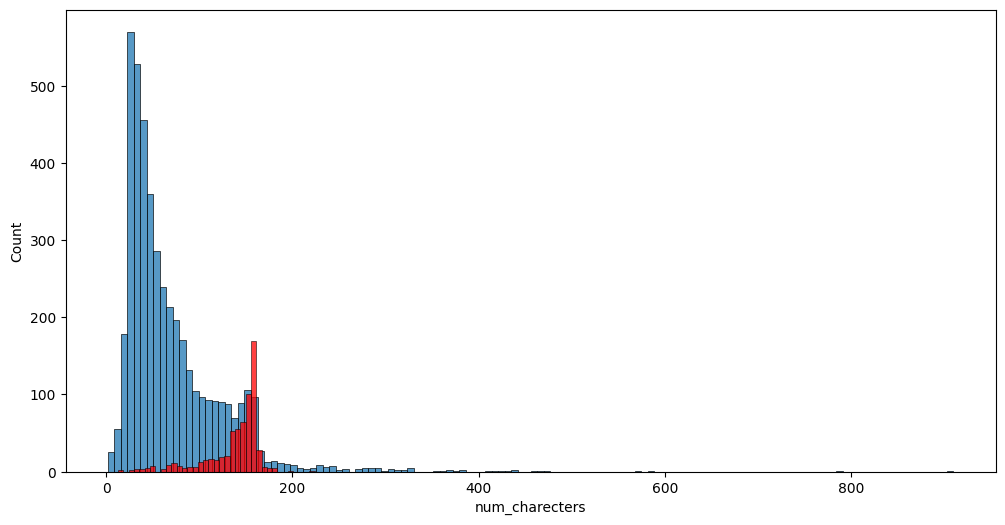

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_charecters'])
sns.histplot(df[df['target'] == 1]['num_charecters'],color='red')

Looking at the histogram from the plot, we can see that:

* Ham messages (blue) tend to have a lower number of characters, with a distribution skewed towards the left (shorter messages).
* Spam messages (red) generally have a higher number of characters, with a distribution shifted towards the right (longer messages).

This suggests that the number of characters could be a useful feature in distinguishing between spam and ham messages. Spam messages are often longer, perhaps to include more promotional content or attempts to convince the recipient.

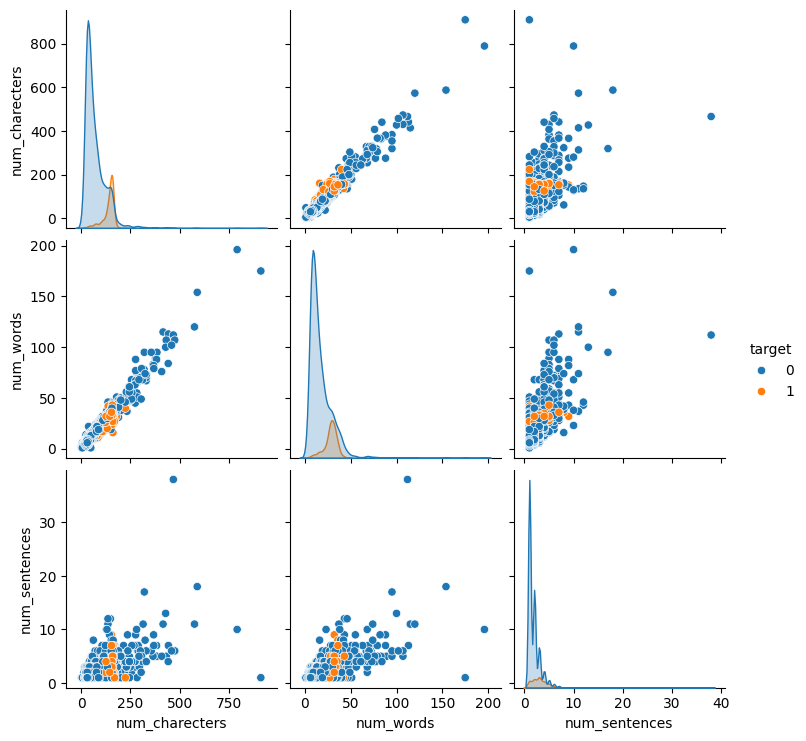

In [ ]:
sns.pairplot(df,hue='target')

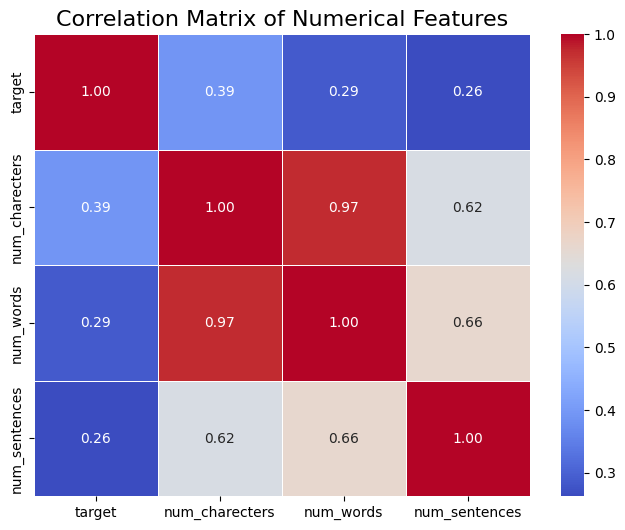

In [ ]:
# Exclude the 'text' column when calculating the correlation matrix
plt.figure(figsize=(8, 6)) # Adjust figure size for better readability
sns.heatmap(df.drop('text', axis=1).corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5) # Added colormap, format, and linewidths
plt.title('Correlation Matrix of Numerical Features', fontsize=16) # Added a title
plt.show() # Display the plot

## 5. Data Preprocessing

* Lower case
* Tokenization
* Removing special characters
* Removing stop words and punctuation
* Stemming

In [ ]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y = []
  for i in text:
    if i.isalnum():
      y.append(i)
  text = y[:] #cloning list
  y.clear()

  for i in text:
    if i not in stopwords.words("english") and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i)) # Use the initialized 'ps' object

  return " ".join(y)

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [ ]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

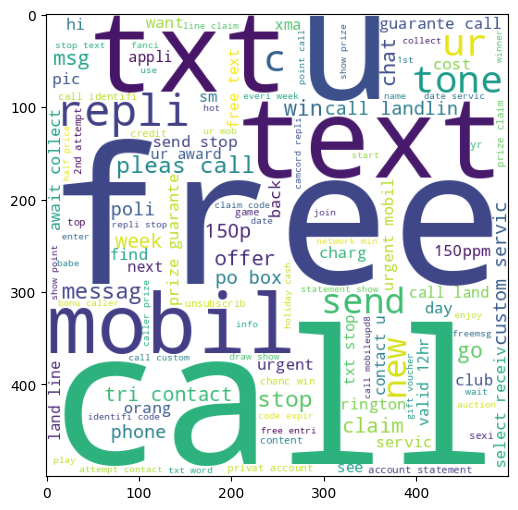

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

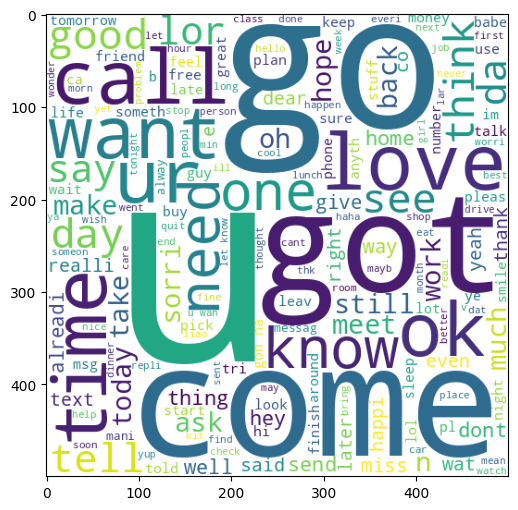

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [ ]:
df.head()

,target,text,num_charecters,num_words,num_sentences,transformed_text
0,0,Hope you are having a good week. Just checking in,49,11,2,hope good week check
1,0,K..give back my thanks.,23,7,1,k give back thank
2,0,Am also doing in cbe only. But have to pay.,43,12,2,also cbe pay
3,1,"complimentary 4 STAR Ibiza Holiday or å£10,000...",150,23,3,complimentari 4 star ibiza holiday cash need u...
4,1,okmail: Dear Dave this is your final notice to...,161,32,3,okmail dear dave final notic collect 4 tenerif...


In [ ]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [ ]:
len(spam_corpus)

9973

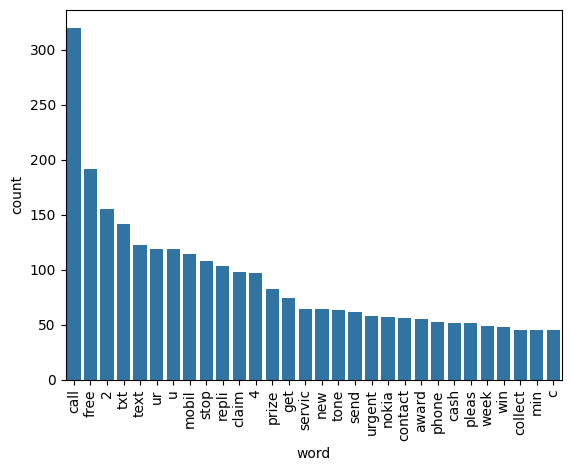

In [ ]:
# Create a DataFrame from the most common words
from collections import Counter # Import Counter
most_common_words = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

# Use the created DataFrame with explicit x and y arguments
sns.barplot(x='word', y='count', data=most_common_words)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [ ]:
len(ham_corpus)

35075

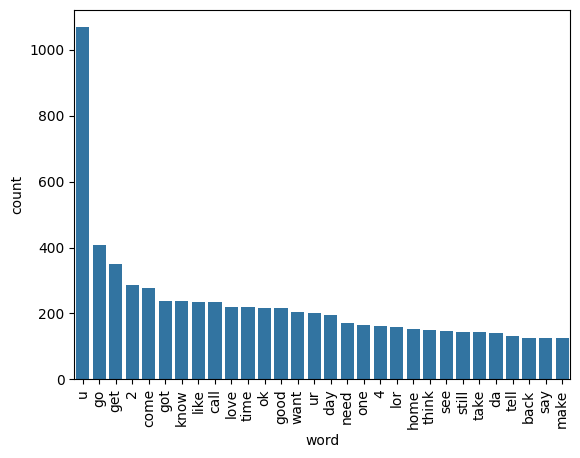

In [ ]:
# Create a DataFrame from the most common words
most_common_words = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])

# Use the created DataFrame with explicit x and y arguments
sns.barplot(x='word', y='count', data=most_common_words)
plt.xticks(rotation='vertical')
plt.show()

## 5. Model Building

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer() #bag of words
tfidf = TfidfVectorizer(max_features=3000) # Make max_feature=3000 inside bracket then run all codes below

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [ ]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [ ]:
X.shape

(5156, 3000)

In [ ]:
y = df['target'].values

In [ ]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print('accuracy_score: ',accuracy_score(y_test,y_pred1))
print('confusion_matrix: \n',confusion_matrix(y_test,y_pred1))
print('precision_score: ',precision_score(y_test,y_pred1))
print('recall_score: ',recall_score(y_test,y_pred1))
print('f1_score: ',f1_score(y_test,y_pred1))

accuracy_score:  0.8488372093023255
confusion_matrix: 
 [[761 135]
 [ 21 115]]
precision_score:  0.46
recall_score:  0.8455882352941176
f1_score:  0.5958549222797928


In [ ]:
mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)
print('accuracy_score: ',accuracy_score(y_test,y_pred1))
print('confusion_matrix: \n',confusion_matrix(y_test,y_pred1))
print('precision_score: ',precision_score(y_test,y_pred1))
print('recall_score: ',recall_score(y_test,y_pred1))
print('f1_score: ',f1_score(y_test,y_pred1))

accuracy_score:  0.9738372093023255
confusion_matrix: 
 [[894   2]
 [ 25 111]]
precision_score:  0.9823008849557522
recall_score:  0.8161764705882353
f1_score:  0.891566265060241


In [ ]:
bnb.fit(X_train,y_train)
y_pred1 = bnb.predict(X_test)
print('accuracy_score: ',accuracy_score(y_test,y_pred1))
print('confusion_matrix: \n',confusion_matrix(y_test,y_pred1))
print('precision_score: ',precision_score(y_test,y_pred1))
print('recall_score: ',recall_score(y_test,y_pred1))
print('f1_score: ',f1_score(y_test,y_pred1))

accuracy_score:  0.9825581395348837
confusion_matrix: 
 [[895   1]
 [ 17 119]]
precision_score:  0.9916666666666667
recall_score:  0.875
f1_score:  0.9296875


(*Bernoulli Naive Bayes*) model appears to be the best among the three. It has the highest precision (99.2%)
*Multinomial Naive Bayes* also performs well, with a very high precision, but Bernoulli Naive Bayes edges it out in both precision and recall.

### Substep: Plot ROC Curve

True Positive Rate (Recall) against the False Positive Rate at different classification thresholds. A better model will have an ROC curve closer to the top-left corner, and a higher AUC score.

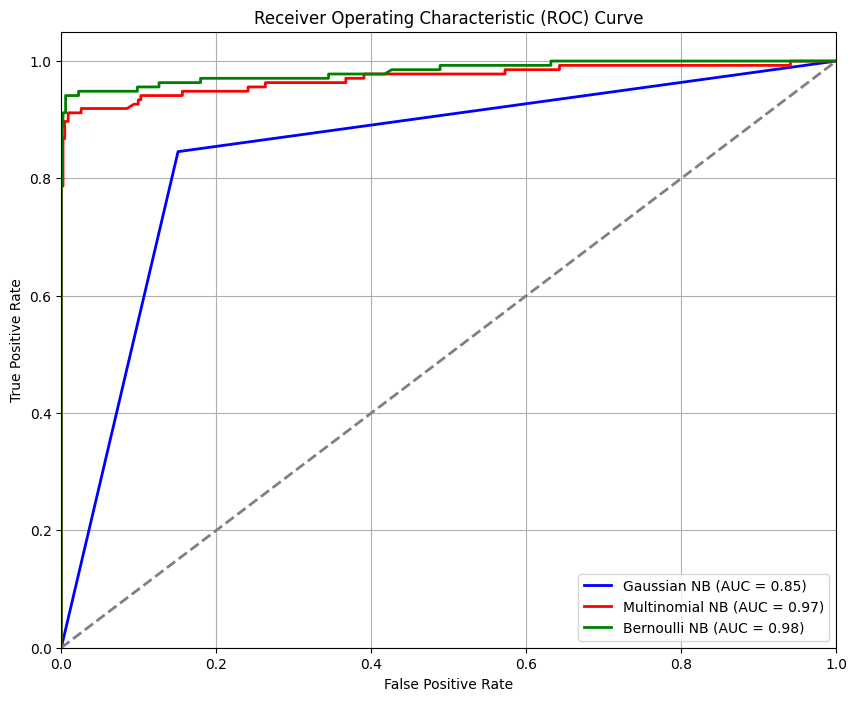

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (spam)
y_prob_gnb = gnb.predict_proba(X_test)[:, 1]
y_prob_mnb = mnb.predict_proba(X_test)[:, 1]
y_prob_bnb = bnb.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC for each model
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test, y_prob_gnb)
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)

fpr_mnb, tpr_mnb, thresholds_mnb = roc_curve(y_test, y_prob_mnb)
roc_auc_mnb = auc(fpr_mnb, tpr_mnb)

fpr_bnb, tpr_bnb, thresholds_bnb = roc_curve(y_test, y_prob_bnb)
roc_auc_bnb = auc(fpr_bnb, tpr_bnb)

# Plot the ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_gnb, tpr_gnb, color='blue', lw=2, label=f'Gaussian NB (AUC = {roc_auc_gnb:.2f})')
plt.plot(fpr_mnb, tpr_mnb, color='red', lw=2, label=f'Multinomial NB (AUC = {roc_auc_mnb:.2f})')
plt.plot(fpr_bnb, tpr_bnb, color='green', lw=2, label=f'Bernoulli NB (AUC = {roc_auc_bnb:.2f})')

# Plot the random chance line
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Perform Hyperparameter Tuning

In [ ]:
# hyperparameter tuning on Multinomial Naive Bayes (MNB) and Bernoulli Naive Bayes (BNB).
# Defining Parameter grids
mnb_param_grid = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
bnb_param_grid = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                  'binarize': [None, 0.0, 0.5, 1.0]}

In [ ]:
from sklearn.model_selection import GridSearchCV

# GridSearchCV for MNB
mnb_grid_search = GridSearchCV(mnb, mnb_param_grid, cv=5, scoring='precision')
mnb_grid_search.fit(X_train, y_train)
print("Best parameters for MNB:", mnb_grid_search.best_params_)

# GridSearchCV for BNB
bnb_grid_search = GridSearchCV(bnb, bnb_param_grid, cv=5, scoring='precision')
bnb_grid_search.fit(X_train, y_train)
print("Best parameters for BNB:", bnb_grid_search.best_params_)

Best parameters for MNB: {'alpha': 0.9}
Best parameters for BNB: {'alpha': 0.6, 'binarize': None}


In [ ]:
from sklearn.model_selection import GridSearchCV

# GridSearchCV for MNB
mnb_grid_search = GridSearchCV(mnb, mnb_param_grid, cv=5, scoring='precision')
mnb_grid_search.fit(X_train, y_train)
print("Best parameters for MNB:", mnb_grid_search.best_params_)

# GridSearchCV for BNB
bnb_grid_search = GridSearchCV(bnb, bnb_param_grid, cv=5, scoring='precision')
bnb_grid_search.fit(X_train, y_train)
print("Best parameters for BNB:", bnb_grid_search.best_params_)

Best parameters for MNB: {'alpha': 0.9}
Best parameters for BNB: {'alpha': 0.6, 'binarize': None}


In [ ]:
# Evaluating the performance of tuned models using appropriate metrics
y_pred_mnb_tuned = mnb_grid_search.predict(X_test)
print('Tuned MNB Performance:')
print('accuracy_score: ',accuracy_score(y_test,y_pred_mnb_tuned))
print('confusion_matrix: \n',confusion_matrix(y_test,y_pred_mnb_tuned))
print('precision_score: ',precision_score(y_test,y_pred_mnb_tuned))
print('recall_score: ',recall_score(y_test,y_pred_mnb_tuned))
print('f1_score: ',f1_score(y_test,y_pred_mnb_tuned))

y_pred_bnb_tuned = bnb_grid_search.predict(X_test)
print('\nTuned BNB Performance:')
print('accuracy_score: ',accuracy_score(y_test,y_pred_bnb_tuned))
print('confusion_matrix: \n',confusion_matrix(y_test,y_pred_bnb_tuned))
print('precision_score: ',precision_score(y_test,y_pred_bnb_tuned))
print('recall_score: ',recall_score(y_test,y_pred_bnb_tuned))
print('f1_score: ',f1_score(y_test,y_pred_bnb_tuned))

Tuned MNB Performance:
accuracy_score:  0.9748062015503876
confusion_matrix: 
 [[894   2]
 [ 24 112]]
precision_score:  0.9824561403508771
recall_score:  0.8235294117647058
f1_score:  0.896

Tuned BNB Performance:
accuracy_score:  0.9651162790697675
confusion_matrix: 
 [[896   0]
 [ 36 100]]
precision_score:  1.0
recall_score:  0.7352941176470589
f1_score:  0.847457627118644


### Training and Evaluating on other Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
# Common ensemble methods for classification:
# - Voting Classifier (Majority Vote or Averaging)
# - Bagging (e.g., BaggingClassifier)
# - Boosting (e.g., AdaBoostClassifier, GradientBoostingClassifier, XGBoostClassifier)
# - Stacking

# Selected ensemble techniques for experimentation:
# 1. Voting Classifier: Combines predictions from multiple diverse models by majority vote or averaging, leveraging the strengths of different base learners.
# 2. BaggingClassifier: Uses bootstrap aggregating to create multiple instances of the same base model on different subsets of the training data and averages their predictions, reducing variance.
# 3. AdaBoostClassifier: A boosting method that trains sequential models, where each subsequent model focuses on correcting the errors of the previous one, improving overall accuracy by reducing bias.
# 4. GradientBoostingClassifier: Another boosting method that builds models sequentially, but instead of re-weighting instances, it fits new models to the residuals of the previous ones, effectively reducing bias.

# The rationale for choosing these methods is to explore different ensemble strategies:
# - Voting: Simple aggregation of diverse models.
# - Bagging: Reduces variance by training identical models on different data subsets.
# - AdaBoost and GradientBoosting: Improve accuracy by sequentially correcting errors and focusing on difficult instances.

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty= 'l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state=2)
abc = AdaBoostClassifier(n_estimators = 50, random_state=2)
bc = BaggingClassifier(n_estimators = 50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state=2)
xgb = XGBClassifier(n_estimators = 50, random_state=2)
# After importing we made objects

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)


  return accuracy, precision, recall, f1

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9777131782945736,
 0.9829059829059829,
 0.8455882352941176,
 0.9090909090909091)

In [ ]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for name,clf in clfs.items():

  current_accuracy, current_precision, current_recall, current_f1 = train_classifier(clf, X_train, y_train, X_test, y_test)
  print("For", name)
  print("Accuracy - ", current_accuracy)
  print("Precision - ", current_precision)
  print("Recall - ", current_recall)
  print("F1-score - ", current_f1)


  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)
  recall_scores.append(current_recall)
  f1_scores.append(current_f1)

For SVC
Accuracy -  0.9777131782945736
Precision -  0.9829059829059829
Recall -  0.8455882352941176
F1-score -  0.9090909090909091
For KN
Accuracy -  0.9118217054263565
Precision -  1.0
Recall -  0.33088235294117646
F1-score -  0.4972375690607735
For DT
Accuracy -  0.9273255813953488
Precision -  0.8279569892473119
Recall -  0.5661764705882353
F1-score -  0.6724890829694323
For LR
Accuracy -  0.9496124031007752
Precision -  0.9565217391304348
Recall -  0.6470588235294118
F1-score -  0.7719298245614035
For RF
Accuracy -  0.9699612403100775
Precision -  0.9906542056074766
Recall -  0.7794117647058824
F1-score -  0.8724279835390947
For AdaBoost
Accuracy -  0.9156976744186046
Precision -  0.7951807228915663
Recall -  0.4852941176470588
F1-score -  0.6027397260273972
For BgC
Accuracy -  0.9525193798449613
Precision -  0.865546218487395
Recall -  0.7573529411764706
F1-score -  0.807843137254902
For GBDT
Accuracy -  0.9515503875968992
Precision -  0.9886363636363636
Recall -  0.63970588235294

In [ ]:
performance_df1 = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores, 'Recall': recall_scores, 'F1-score': f1_scores}).sort_values('Precision', ascending=False)

In [ ]:
performance_df1

,Algorithm,Accuracy,Precision,Recall,F1-score
1,KN,0.911822,1.000000,0.330882,0.497238
4,RF,0.969961,0.990654,0.779412,0.872428
7,GBDT,0.951550,0.988636,0.639706,0.776786
0,SVC,0.977713,0.982906,0.845588,0.909091
3,LR,0.949612,0.956522,0.647059,0.771930
8,xgb,0.962209,0.944954,0.757353,0.840816
6,BgC,0.952519,0.865546,0.757353,0.807843
2,DT,0.927326,0.827957,0.566176,0.672489
5,AdaBoost,0.915698,0.795181,0.485294,0.602740


In [ ]:
# Create new rows for the tuned models' performance
tuned_mnb_performance = pd.DataFrame({
    'Algorithm': ['Tuned MNB'],
    'Accuracy': [accuracy_score(y_test, y_pred_mnb_tuned)],
    'Precision': [precision_score(y_test, y_pred_mnb_tuned)],
    'Recall': [recall_score(y_test, y_pred_mnb_tuned)],
    'F1-score': [f1_score(y_test, y_pred_mnb_tuned)]
})

tuned_bnb_performance = pd.DataFrame({
    'Algorithm': ['Tuned BNB'],
    'Accuracy': [accuracy_score(y_test, y_pred_bnb_tuned)],
    'Precision': [precision_score(y_test, y_pred_bnb_tuned)],
    'Recall': [recall_score(y_test, y_pred_bnb_tuned)],
    'F1-score': [f1_score(y_test, y_pred_bnb_tuned)]
})

# Concatenate the new rows to the existing DataFrame
performance_df_updated = pd.concat([performance_df1, tuned_mnb_performance, tuned_bnb_performance], ignore_index=True)

# Display the updated DataFrame, sorted by Precision
display(performance_df_updated.sort_values('Precision', ascending=False))

,Algorithm,Accuracy,Precision,Recall,F1-score
0,KN,0.911822,1.000000,0.330882,0.497238
10,Tuned BNB,0.965116,1.000000,0.735294,0.847458
1,RF,0.969961,0.990654,0.779412,0.872428
2,GBDT,0.951550,0.988636,0.639706,0.776786
3,SVC,0.977713,0.982906,0.845588,0.909091
9,Tuned MNB,0.974806,0.982456,0.823529,0.896000
4,LR,0.949612,0.956522,0.647059,0.771930
5,xgb,0.962209,0.944954,0.757353,0.840816
6,BgC,0.952519,0.865546,0.757353,0.807843
7,DT,0.927326,0.827957,0.566176,0.672489


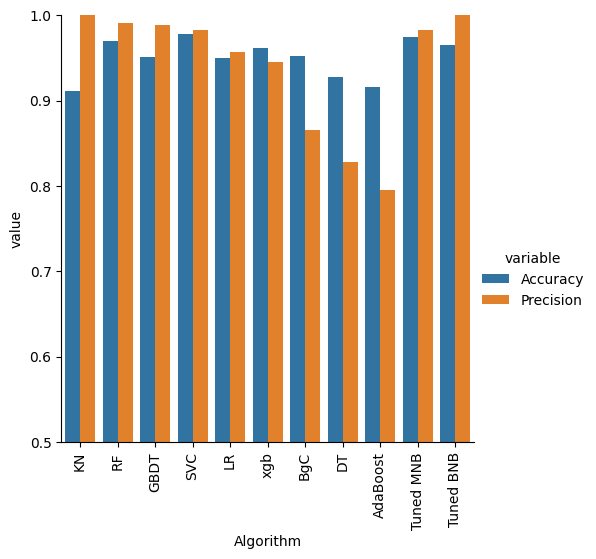

In [ ]:
performance_df_melted = pd.melt(performance_df_updated, id_vars=['Algorithm'], value_vars=['Accuracy', 'Precision'])
sns.catplot(x = 'Algorithm', y = 'value', hue = 'variable', data = performance_df_melted, kind='bar', height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

## 6. Deep Learning

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Initialize and fit tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['transformed_text'])

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(df['transformed_text'])

# Determine max sequence length (or choose a suitable length)
max_sequence_length = max([len(x) for x in sequences])
print(f"Maximum sequence length: {max_sequence_length}")

# Pad sequences
X_padded = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

# Convert target to NumPy array
y = df['target'].values

Maximum sequence length: 65


In [ ]:
from sklearn.model_selection import train_test_split

# Split the padded data into training and testing sets
X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(X_padded, y, test_size=0.2, random_state=42)

print("Shape of X_train_dl:", X_train_dl.shape)
print("Shape of X_test_dl:", X_test_dl.shape)
print("Shape of y_train_dl:", y_train_dl.shape)
print("Shape of y_test_dl:", y_test_dl.shape)

Shape of X_train_dl: (4124, 65)
Shape of X_test_dl: (1032, 65)
Shape of y_train_dl: (4124,)
Shape of y_test_dl: (1032,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam


vocab_size = len(tokenizer.word_index) + 1

# Build the RNN model
model = Sequential()
model.add(Embedding(vocab_size, 50, input_length=max_sequence_length)) # Embedding layer
model.add(SimpleRNN(64, return_sequences=False)) # Simple RNN layer
model.add(Dropout(0.5)) # Dropout for regularization
model.add(Dense(1, activation='sigmoid')) # Output layer for binary classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(X_train_dl, y_train_dl, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.8471 - loss: 0.4381 - val_accuracy: 0.8873 - val_loss: 0.3540
Epoch 2/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.8803 - loss: 0.3362 - val_accuracy: 0.9430 - val_loss: 0.1910
Epoch 3/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - accuracy: 0.9496 - loss: 0.1630 - val_accuracy: 0.9285 - val_loss: 0.2175
Epoch 4/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.9666 - loss: 0.1080 - val_accuracy: 0.9333 - val_loss: 0.2102
Epoch 5/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.9907 - loss: 0.0550 - val_accuracy: 0.9576 - val_loss: 0.1720
Epoch 6/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.9927 - loss: 0.0347 - val_accuracy: 0.9370 - val_loss: 0.2464
Epoch 7/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 7s 64ms/step - accuracy: 0.9946 - loss: 0.0237 - val_accuracy: 0.9576 - val_loss: 0.2008
Epoch 8/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 8s 76ms/step - accuracy: 0.9946 - loss: 0.0205 - val_accu

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_dl, y_test_dl)
print(f"Deep Learning Model - Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9429 - loss: 0.2777
Deep Learning Model - Loss: 0.2790, Accuracy: 0.9409


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Get predictions for the test set
y_pred_dl = (model.predict(X_test_dl) > 0.5).astype("int32")

# Calculate precision, recall, and F1-score
precision_dl = precision_score(y_test_dl, y_pred_dl)
recall_dl = recall_score(y_test_dl, y_pred_dl)
f1_dl = f1_score(y_test_dl, y_pred_dl)

print(f"Deep Learning Model - Precision: {precision_dl:.4f}")
print(f"Deep Learning Model - Recall: {recall_dl:.4f}")
print(f"Deep Learning Model - F1-score: {f1_dl:.4f}")

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Deep Learning Model - Precision: 0.7586
Deep Learning Model - Recall: 0.8088
Deep Learning Model - F1-score: 0.7829


In [ ]:
# Compare the performance with the best ML model (Tuned MNB)

# Create a DataFrame to hold the performance metrics for comparison
performance_comparison_df = pd.DataFrame({
    'Model': ['Tuned MNB', 'Deep Learning Model'],
    'Accuracy': [accuracy_score(y_test, y_pred_mnb_tuned), accuracy],
    'Precision': [precision_score(y_test, y_pred_mnb_tuned), precision_dl],
    'Recall': [recall_score(y_test, y_pred_mnb_tuned), recall_dl],
    'F1-score': [f1_score(y_test, y_pred_mnb_tuned), f1_dl]
})

# Display the comparison table
display(performance_comparison_df.sort_values('Precision', ascending=False))

,Model,Accuracy,Precision,Recall,F1-score
0,Tuned MNB,0.974806,0.982456,0.823529,0.896000
1,Deep Learning Model,0.940891,0.758621,0.808824,0.782918
